# Title :Analysis of Startup Funding in India (2018-2021)

## Project Description:
To exploration of the Indian startup funding ecosystem from 2018 to 2021 in this comprehensive project. We will get into details of the datasets, each representing a year of funding entrepreneurial activities, we aim to uncover patterns, trends, and critical insights that characterize the funding ecosystem during this transformative period.

In [1]:
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd # For data manipulation and analysis
import numpy as np
import warnings 
from scipy import stats
import statistics as stat
from scipy.stats import f_oneway

warnings.filterwarnings('ignore')
# Data Visualization
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file

database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('UID')
password = environment_variables.get('PWD')


# Connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:

# Establish a connection
connection = pyodbc.connect(connection_string)

## Reading data for the year 2020 and 2021 from SQL Server

In [4]:
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2020"

# Read data from the SQL query result
data_2020 = pd.read_sql(query, connection)

# SQL query to fetch data from 'dbo.LP1_startup_funding2021' table
query = "Select * from dbo.LP1_startup_funding2021"

# Read data from the SQL query result
data_2021 = pd.read_sql(query, connection)

In [5]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [6]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [7]:
# Number of rows and columns for 2020
data_2020.shape

(1055, 10)

## Data Cleaning

In [8]:
# Identify missing values
print("Missing Data:")
data_2020.isnull().sum()

Missing Data:


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [9]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [10]:
# Number of rows and columns for 2020
data_2021.shape

(1209, 9)

## Data for the year 2018 and 2019 from the CSV Files

In [11]:
# Read CSV files into DataFrames for the year 2019
data_2019 = pd.read_csv('startup_funding2019.csv')

# Read CSV files into DataFrames for the year 2018
data_2018 = pd.read_csv('startup_funding2018.csv')

In [12]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [13]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


# Data understanding

### Data Cleaning for 2020

In [14]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [15]:
# Number of rows and columns for 2020
data_2020.shape

(1055, 10)

In [16]:
# Identify missing values
print("Missing Data:")
data_2020.isnull().sum()

Missing Data:


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [17]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [18]:
#Rename of colums 2020
data_2020.rename(columns={'What_it_does':'What it does',} , inplace=True)

In [19]:
# Drop the column10
data1= data_2020.drop('column10', axis=1)

In [20]:
# To confirm column10 is dropped
data1.columns


Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [21]:
# Identify missing values
print("Missing Data:")
data1.isnull().sum()

Missing Data:


Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What it does       0
Founders          12
Investor          38
Amount           254
Stage            464
dtype: int64

In [22]:
#checking Missing Values on Amount Column
missing_values_amount = data1['Amount'].isna()

# Display rows where 'Amount' is missing

df_missing_amount = data1[missing_values_amount]
df_missing_amount

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
7,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series
11,Medfin,2017.0,Bangalore,HealthTech,Medfin is a Discovery platform for medical pro...,"Arjun Kumar, Arun Kumar, Sidharth Gurjar","Axilor Ventures, S.D. Shibulal",NaN,Series A
12,MasterG,2015.0,New Delhi,Fashion startup,MasterG is a design and skill development orga...,Gayatri Jolly,Acumen Fund's angel programme,NaN,None
18,Pine Labs,1998.0,Noida,FinTech,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",NaN,None
...,...,...,...,...,...,...,...,...,...
1023,Skilancer,NaN,Noida,Technology,Solar module cleaning system [MCS] providers,Neeraj Kumar,Venture Catalysts,NaN,None
1024,Harappa Education,NaN,New Delhi,Edtech,Provides online courses on foundational skills,Pramath Raj Sinha,James Murdoch-led Lupa Systems,NaN,None
1028,PayMart,2015.0,Chandigarh,Fintech,Provides cardless cash withdrawals through sma...,Amit Narang,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh...",NaN,None
1040,BuildPan,2019.0,Indore,SaaS,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",NaN,Seed Round


In [23]:
# Impute missing values in the 'Amount' column with the median
data1['Amount'].fillna(data1['Amount'].median(), inplace=True)


In [24]:
# Identify missing values
print("Missing Data:")
data1.isnull().sum()

Missing Data:


Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What it does       0
Founders          12
Investor          38
Amount             0
Stage            464
dtype: int64

In [25]:
data1.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What it does       0
Founders          12
Investor          38
Amount             0
Stage            464
dtype: int64

In [26]:
# Remove missing values
data1.dropna(inplace=True)

In [27]:
data1

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
6,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
7,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,3000000.0,Pre-series
...,...,...,...,...,...,...,...,...,...
1046,FarmERP,2001.0,Pune,Agritech,Smart agriculture management ERP software plat...,"Santosh Shinde, Sanjay Borkar",TechnoGen,3000000.0,Series A
1048,GoMechanic,2016.0,Delhi,Automobile Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...","Chiratae Ventures, Sequoia Capital, Orios Vent...",14700000.0,Series B
1049,Fashor,2017.0,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [28]:
data1.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [29]:
# Checking for duplicates
data1.duplicated().sum()


1

In [30]:
# Removing duplicate rows
data1 = data1.drop_duplicates().reset_index(drop=True)


In [31]:
#checking the unique values in the amount column
amount_unique=data1['Amount'].unique()
amount_unique


array([1.0000e+05, 3.0000e+06, 6.0000e+05, 4.5000e+07, 1.0000e+06,
       2.0000e+06, 7.5000e+06, 1.0000e+07, 2.1000e+07, 5.6000e+05,
       4.0000e+05, 2.7500e+05, 2.0000e+07, 1.5000e+07, 5.1000e+06,
       5.0000e+05, 2.3000e+06, 7.0000e+05, 9.0000e+06, 4.0000e+07,
       1.2000e+06, 7.5000e+05, 1.5000e+06, 7.8000e+06, 4.0000e+06,
       8.0000e+07, 4.0000e+04, 3.5000e+07, 3.0000e+05, 2.5000e+07,
       3.5000e+06, 2.0000e+08, 7.0000e+06, 6.0000e+06, 1.3000e+06,
       8.0000e+05, 1.8000e+07, 1.0000e+08, 5.0000e+06, 9.0000e+05,
       7.5000e+07, 1.2100e+08, 2.0000e+05, 3.3000e+06, 1.1000e+07,
       4.5000e+06, 1.5000e+08, 2.2000e+07, 1.1000e+06, 4.2000e+06,
       1.7000e+06, 1.6000e+06, 5.5000e+07, 1.2000e+07, 1.3400e+07,
       1.7000e+08, 2.9000e+06, 9.0000e+07, 3.0000e+07, 3.4000e+06,
       2.3000e+07, 8.0900e+06, 1.0300e+06, 5.0400e+06, 8.0000e+06,
       1.4000e+06, 6.5000e+05, 5.4000e+07, 4.2500e+07, 2.8000e+07,
       1.1370e+07, 3.2500e+05, 4.1000e+05, 6.8200e+05, 5.0600e

In [32]:
# Number of rows and columns for 2020
data1.shape

(422, 9)

In [33]:
#Checking on the dtypes
data1.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

In [34]:
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
1,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
2,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
3,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
4,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,3000000.0,Pre-series


### Data Cleaning for 2021

In [35]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [36]:
# Number of rows and columns for 2020
data_2021.shape

(1209, 9)

In [37]:
# Identify missing values
print("Missing Data:")
data_2021.isnull().sum()

Missing Data:


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [38]:
# Remove missing values
data_2021.dropna(inplace=True)

In [39]:
# Identify missing values
print("Missing Data:")
data_2021.isnull().sum()

Missing Data:


Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [40]:
# Checking for duplicates
data_2021.duplicated().sum()


12

In [41]:
duplicate_rows = data_2021[data_2021.duplicated()]
duplicate_rows


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed
250,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed
251,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A
252,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A


In [42]:
#Drop the duplicate row
data_2021.drop_duplicates(inplace=True)

In [43]:
# Checking for duplicates
data_2021.duplicated().sum()

0

In [44]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [45]:
#Rename of colums 2021
data_2021.rename(columns={'What_it_does':'What it does',} , inplace=True)

In [46]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [47]:
data1_dtypes = data_2021.dtypes
data1_dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [48]:
#checking the unique values in the amount column
amount_unique=data_2021['Amount'].unique()
amount_unique


array(['$1,200,000', '$30,000,000', '$51,000,000', '$2,000,000',
       'Undisclosed', '$3,000,000', '$700,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$850,000', '$53,000,000', '$800,000', '$500,000', '$100,000',
       '$7,500,000', '$1,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$83,000,000', '$26,000,000', '$65,000,000', '$35,000,000',
       '$140,000,000', '$200,000', '$4,000,000', '$1,100,000', 'Upsparks',
       '$5000000', '$Undisclosed', '$200000', '$12000000', '$1500000',
       '$2000000', '$5500000', '$4000000', '$100000000', '$6000000',
       '$1000000', '$500000', '$40000000', '$225000000', '$6700000',
       '$1300000', '$20000000', '$250000', '$21000000', '$400000',
       '$8500000', '$1700000', '$3500000', '$25000000', '$3000000',
       '$37000000', '$370000000', '$700000', '$16000000', '$10000000',
       '$44000000', '$300000', '$770000'

In [49]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2021['Amount'] = data_2021['Amount'].replace('[\$,]', '', regex=True).replace(['Undisclosed','Upsparks','J0','undisclosed','ah! Ventures','ITO Angel Network LetsVenture', 'LetsVenture','JITO Angel Network'],'0', regex=True)




In [50]:
#checking the unique values in the amount column
amount_unique=data_2021['Amount'].unique()
amount_unique


array(['1200000', '30000000', '51000000', '2000000', '0', '3000000',
       '700000', '400000', '300000', '25000000', '160000000', '150000',
       '1800000', '850000', '53000000', '800000', '500000', '100000',
       '7500000', '1000000', '17000000', '3500000', '15000000',
       '215000000', '2500000', '350000000', '83000000', '26000000',
       '65000000', '35000000', '140000000', '200000', '4000000',
       '1100000', '5000000', '12000000', '1500000', '5500000',
       '100000000', '6000000', '40000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '21000000', '8500000', '1700000',
       '37000000', '370000000', '16000000', '10000000', '44000000',
       '770000', '125000000', '4900000', '22000000', '13000000',
       '70000000', '7000000', '6600000', '32000000', '150000000',
       '24000000', '725000', '461000', '96000000', '60000000',
       '266000000', '4500000', '6500000', '225000', '85000000', '235000',
       '260000', '2900000', '86000000', '10000', '11

In [51]:
data_2021.dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [52]:
#change the Amount data type from object to float
# 'coerce' option will replace any non-numeric values with NaN
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'], errors='coerce')




In [53]:
data1_dtypes = data_2021.dtypes
data1_dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

In [54]:
# Display column names and data types
print("Columns and Data Types for 2020 data:")
print(data1.dtypes)

print("\nColumns and Data Types for 2021 data:")
print(data_2021.dtypes)

# Check if columns are the same
if set(data1.columns) == set(data1.columns):
    print("\nThe SQL files have the same columns.")
else:
    print("\nThe SQL files do not have the same columns.")

# Check if data types are the same
if (data1.dtypes.equals(data_2021.dtypes)):
    print("\nThe SQL files have the same data types.")
else:
    print("\nThe SQL files do not have the same data types.")


Columns and Data Types for 2020 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

Columns and Data Types for 2021 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

The SQL files have the same columns.

The SQL files have the same data types.


In [55]:
# Concatenate the data for 2020 and 2021
combined_data = pd.concat([data1, data_2021], ignore_index=True)

In [56]:
combined_data 

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
1,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
2,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
3,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
4,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,3000000.0,Pre-series
...,...,...,...,...,...,...,...,...,...
1146,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A
1147,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D
1148,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C
1149,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B


In [57]:
# Identify missing values
print("Missing Data:")
combined_data .isnull().sum()

Missing Data:


Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           2
Stage            0
dtype: int64

In [58]:
# Remove missing values
combined_data.dropna(inplace=True)

In [59]:
combined_data.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [60]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1150
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1149 non-null   object 
 1   Founded        1149 non-null   float64
 2   HeadQuarter    1149 non-null   object 
 3   Sector         1149 non-null   object 
 4   What it does   1149 non-null   object 
 5   Founders       1149 non-null   object 
 6   Investor       1149 non-null   object 
 7   Amount         1149 non-null   float64
 8   Stage          1149 non-null   object 
dtypes: float64(2), object(7)
memory usage: 89.8+ KB


### Data Cleaning for 2018

In [61]:
# Read CSV files into DataFrames
data_2018 = pd.read_csv('startup_funding2018.csv')

In [62]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [63]:
# Number of rows and columns for 2018
data_2018.shape

(526, 6)

In [64]:
# Identify missing values
print("Missing Data:")
data_2018.isnull().sum()

Missing Data:


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [65]:
# Checking for duplicates
data_2018.duplicated().sum()

1

In [66]:
duplicate_rows = data_2018[data_2018.duplicated()]
duplicate_rows

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [67]:
#Drop the duplicate row
data_2018.drop_duplicates(inplace=True)

In [68]:
# Checking for duplicates
data_2018.duplicated().sum()

0

In [69]:
data_2018.dtypes


Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
dtype: object

In [70]:
#checking the unique values in the amount column
amount_unique=data_2018['Amount'].unique()
amount_unique

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [71]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2018['Amount'] = data_2018['Amount'].replace('[\,]', '', regex=True).replace(['—'],'0', regex=True)


In [72]:
#checking the unique values in the amount column
amount_unique=data_2018['Amount'].unique()
amount_unique

array(['250000', '₹40000000', '₹65000000', '2000000', '0', '1600000',
       '₹16000000', '₹50000000', '₹100000000', '150000', '1100000',
       '₹500000', '6000000', '650000', '₹35000000', '₹64000000',
       '₹20000000', '1000000', '5000000', '4000000', '₹30000000',
       '2800000', '1700000', '1300000', '₹5000000', '₹12500000',
       '₹15000000', '500000', '₹104000000', '₹45000000', '13400000',
       '₹25000000', '₹26400000', '₹8000000', '₹60000', '9000000',
       '100000', '20000', '120000', '₹34000000', '₹342000000', '$143145',
       '₹600000000', '$742000000', '₹1000000000', '₹2000000000',
       '$3980000', '$10000', '₹100000', '₹250000000', '$1000000000',
       '$7000000', '$35000000', '₹550000000', '$28500000', '$2000000',
       '₹240000000', '₹120000000', '$2400000', '$30000000', '₹2500000000',
       '$23000000', '$150000', '$11000000', '₹44000000', '$3240000',
       '₹60000000', '$540000000', '₹650000000', '₹1600000000', '$900000',
       '$10000000', '$1500000', '₹

In [73]:

def currency_to_usd(row):
    
    # Exchange rates 1rupee = 0.012
    # Check if the amount starts with ₹
    if str(row['Amount']).startswith('₹'):
        return float(str(row['Amount']).replace('₹', '').replace(',', '')) * 0.012

    # Check if the amount starts with '$'
    elif str(row['Amount']).startswith('$'):
        return float(str(row['Amount']).replace('$', '').replace(',', ''))

    # If no currency symbol is found, assume it's in USD
    else:
        return float(str(row['Amount']).replace(',', ''))

# Apply the function to the 'Amount' column
data_2018['Amount_USD'] = data_2018.apply(currency_to_usd, axis=1)

# Display the updated DataFrame
data_2018[['Amount', 'Amount_USD']]


,Amount,Amount_USD
0,250000,250000.0
1,₹40000000,480000.0
2,₹65000000,780000.0
3,2000000,2000000.0
4,0,0.0
...,...,...
521,225000000,225000000.0
522,0,0.0
523,7500,7500.0
524,₹35000000,420000.0


In [74]:

#checking the unique values in the amount column
data_2018['Amount_USD'].unique


<bound method Series.unique of 0         250000.0
1         480000.0
2         780000.0
3        2000000.0
4              0.0
          ...     
521    225000000.0
522            0.0
523         7500.0
524       420000.0
525     35000000.0
Name: Amount_USD, Length: 525, dtype: float64>

In [75]:
# Drop the 'Amount' column
data_2018 = data_2018.drop('Amount', axis=1)

In [76]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Location', 'About Company',
       'Amount_USD'],
      dtype='object')

In [77]:
# Number of rows and columns for 2018
data_2018.shape

(525, 6)

In [78]:
#Rename of colums 2018
data_2018.rename(columns={'Industry':'Sector','Company Name':'Company_Brand','About Company':'What it does','Round/Series':'Stage','Amount_USD':'Amount','Location':'HeadQuarter'} , inplace=True)


In [79]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4   What it does   525 non-null    object 
 5   Amount         525 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.7+ KB


### Data Cleaning for 2019

In [80]:
data_2019 = pd.read_csv('startup_funding2019.csv')

In [81]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [82]:
# Number of rows and columns for 2019
data_2019.shape

(89, 9)

In [83]:
# Identify missing values
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [84]:
# Checking for duplicates
data_2019.duplicated().sum()

0

In [85]:
df = data_2019.dtypes
df

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [86]:
#checking the unique values in the amount column
amount_unique=data_2019['Amount($)'].unique()
amount_unique

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [87]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2019['Amount($)'] = data_2019['Amount($)'].replace('[\$,]', '', regex=True).replace(['Undisclosed'],'0', regex=True)


In [88]:
#checking the unique values in the amount column
amount_unique=data_2019['Amount($)'].unique()
amount_unique

array(['6300000', '150000000', '28000000', '30000000', '6000000', '0',
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [89]:
# Convert 'Amount($)' column to float
data_2019['Amount($)'] = data_2019['Amount($)'].astype(float)



In [90]:
df_2019 = data_2019.dtypes
df_2019

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [91]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     float64
 8   Stage          43 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


In [92]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [93]:
#Rename of colums 2019
data_2019.rename(columns={'Company/Brand':'Company_Brand','Round/Series':'Stage','Amount($)':'Amount'} , inplace=True)

In [94]:
data_2019 .info()
data_2018 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     float64
 8   Stage          43 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 

In [95]:
# Display column names and data types
print("Columns and Data Types for 2019 data:")
print(data_2019 .dtypes)

print("\nColumns and Data Types for 2018 data:")
print(data_2018 .dtypes)

# Check if columns are the same
if set(data_2019.columns) == set(data_2018.columns):
    print("\nThe CSV files have the same columns.")
else:
    print("\nThe CSV files do not have the same columns.")

# Check if data types are the same
if (data_2019.dtypes.equals(data_2018.dtypes)):
    print("\nThe CSV files have the same data types.")
else:
    print("\nThe CSV files do not have the same data types.")


Columns and Data Types for 2019 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

Columns and Data Types for 2018 data:
Company_Brand     object
Sector            object
Stage             object
HeadQuarter       object
What it does      object
Amount           float64
dtype: object

The CSV files do not have the same columns.

The CSV files do not have the same data types.


In [96]:
# Print column names for each DataFrame
print("data_2018 columns:", data_2018.columns)
print("data_2019 columns:", data_2019.columns)
print("combined_data columns:", combined_data.columns)


data_2018 columns: Index(['Company_Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does',
       'Amount'],
      dtype='object')
data_2019 columns: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
combined_data columns: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


In [97]:


# data_2018, data_2019, and combined_data DataFrames
# Concatenate data_2018 and data_2019 vertically
Final_Combined_data = pd.concat([data_2018, data_2019, combined_data], ignore_index=True)

# Verify the concatenated data
Final_Combined_data.head()


,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,NaN,NaN,NaN


## Data Cleaning and Preparation

In [98]:
Final_Combined_data.describe()

,Amount,Founded
count,1.763000e+03,1209.000000
mean,1.726627e+07,2016.629446
std,6.054725e+07,3.529440
min,0.000000e+00,1982.000000
25%,4.144000e+05,2015.000000
50%,2.000000e+06,2017.000000
75%,7.400000e+06,2019.000000
max,1.000000e+09,2021.000000


In [99]:
#Checking missing value in the  DataFrame
missing_values = Final_Combined_data.isnull().sum()

# Display the count of missing values for each column
missing_values


Company_Brand      0
Sector             5
Stage             46
HeadQuarter       19
What it does       0
Amount             0
Founded          554
Founders         528
Investor         525
dtype: int64

In [100]:
Final_Combined_data['Founded']


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
1758    2019.0
1759    2015.0
1760    2019.0
1761    2015.0
1762    2019.0
Name: Founded, Length: 1763, dtype: float64

In [101]:
Final_Combined_data['Founded'].fillna(Final_Combined_data['Founded'].median(), inplace=True)



In [102]:
Final_Combined_data['Founders']


0                                 NaN
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
                    ...              
1758      Chirag Mittal, Anirudh Syal
1759                       Bala Sarda
1760       Arnav Kumar, Vaibhav Singh
1761                     Ruchir Arora
1762    Vishal Chopra, Himanshu Gupta
Name: Founders, Length: 1763, dtype: object

In [103]:
Final_Combined_data['Founders'].fillna('Unknown', inplace=True)


In [104]:
Final_Combined_data['Investor']

0                                    NaN
1                                    NaN
2                                    NaN
3                                    NaN
4                                    NaN
                      ...               
1758                     Endiya Partners
1759                            IIFL AMC
1760                        Owl Ventures
1761    Winter Capital, ETS, Man Capital
1762      3one4 Capital, Kalaari Capital
Name: Investor, Length: 1763, dtype: object

In [105]:
Final_Combined_data['Investor'].fillna('Investor', inplace=True)

In [106]:
#Checking missing value in the  DataFrame
missing_values = Final_Combined_data.isnull().sum()

# Display the count of missing values for each column
missing_values


Company_Brand     0
Sector            5
Stage            46
HeadQuarter      19
What it does      0
Amount            0
Founded           0
Founders          0
Investor          0
dtype: int64

In [107]:
Final_Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1763 non-null   object 
 1   Sector         1758 non-null   object 
 2   Stage          1717 non-null   object 
 3   HeadQuarter    1744 non-null   object 
 4   What it does   1763 non-null   object 
 5   Amount         1763 non-null   float64
 6   Founded        1763 non-null   float64
 7   Founders       1763 non-null   object 
 8   Investor       1763 non-null   object 
dtypes: float64(2), object(7)
memory usage: 124.1+ KB


In [108]:
#Rename of colums 2018
Final_Combined_data.rename(columns={'Amount':'Amount($)'} , inplace=True)


### Exploratory Data Analysis (EDA)

In [109]:
Final_Combined_data.head()

,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2017.0,Unknown,Investor
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0,2017.0,Unknown,Investor
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0,2017.0,Unknown,Investor
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,2017.0,Unknown,Investor
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,2017.0,Unknown,Investor


## Descriptive Statistics:
### Summary statistics of numerical columns.

In [110]:
# Summary statistics

Final_Combined_data.describe()


,Amount($),Founded
count,1.763000e+03,1763.000000
mean,1.726627e+07,2016.745888
std,6.054725e+07,2.927439
min,0.000000e+00,1982.000000
25%,4.144000e+05,2016.000000
50%,2.000000e+06,2017.000000
75%,7.400000e+06,2018.000000
max,1.000000e+09,2021.000000


## Issues with the data

### Check for Inconsistent Data Entry:

In [111]:
# Display unique values in the "Stage" column
print(Final_Combined_data['Stage'].unique())

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' 'Pre-seed' 'Pre-series' 'Debt' 'Pre-series C'
 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge' 'Pre-Series B'
 'Seed A' 'Series A-1' 'Pre-seed Round' 'Seed Round & Series A'
 'Pre Series A' 'Pre seed Round' 'Series E2' 'Bridge Round' 'Seed Round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Pre seed round' 'Series C, D' 'Seed Funding' '$1200000' 'Seed+'
 'Series F2' 'Series A+' 'Series B3' 'PE' 'Series F1' 'Pre-ser

In [112]:
# Standardize the "Stage" column to lowercase
Final_Combined_data['Stage'] = Final_Combined_data['Stage'].str.lower()

In [113]:
# Combine similar Seed categories
Final_Combined_data['Stage'].replace({'seed round': 'Seed', 'seed funding': 'Seed', 'seed+': 'Seed'}, inplace=True)


In [114]:
# Remove unnecessary entries
Final_Combined_data = Final_Combined_data[~Final_Combined_data['Stage'].astype(str).str.contains('https://|docs.google.com/spreadsheets/')]


In [115]:
# Display unique values in the "Stage" column after corrections
Final_Combined_data['Stage'].unique()

array(['seed', 'series a', 'angel', 'series b', 'pre-seed',
       'private equity', 'venture - series unknown', 'grant',
       'debt financing', 'post-ipo debt', 'series h', 'series c',
       'series e', 'corporate round', 'undisclosed', 'series d',
       'secondary market', 'post-ipo equity', 'non-equity assistance',
       'funding round', nan, 'fresh funding', 'pre series a', 'series g',
       'post series a', 'Seed', 'seed fund', 'series f', 'series b+',
       'pre-series a', 'pre-series', 'debt', 'pre-series c',
       'pre-series b', 'bridge', 'series b2', 'pre- series a', 'edge',
       'seed a', 'series a-1', 'pre-seed round', 'seed round & series a',
       'pre seed round', 'series e2', 'bridge round', 'pre series b',
       'pre series c', 'seed investment', 'series d1', 'mid series',
       'series c, d', '$1200000', 'series f2', 'series a+', 'series b3',
       'pe', 'series f1', 'pre-series a1', '$300000', 'early seed',
       'seies a', 'series a2', 'series i'], dt

In [116]:
# Display unique values in the "Sector" column
Final_Combined_data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [117]:
# Display values in the "HeadQuarter" column
Final_Combined_data['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [118]:
# Drop rows with missing values in the 'HeadQuarter' column
Final_Combined_data = Final_Combined_data.dropna(subset=['HeadQuarter'])

# List of industry classifications to drop
industries_to_drop = ['information technology & services', 'food & beverages', 'computer games']

# Create a boolean mask to identify rows with the specified industries
mask = Final_Combined_data['HeadQuarter'].str.lower().str.contains('|'.join(industries_to_drop))

# Use the boolean mask to drop the rows
Final_Combined_data = Final_Combined_data[~mask]

# Display unique values after dropping
print(Final_Combined_data['HeadQuarter'].unique())


['Bangalore, Karnataka, India' 'Mumbai, Maharashtra, India'
 'Gurgaon, Haryana, India' 'Noida, Uttar Pradesh, India'
 'Hyderabad, Andhra Pradesh, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'Delhi, Delhi, India' 'India, Asia'
 'Hubli, Karnataka, India' 'New Delhi, Delhi, India'
 'Chennai, Tamil Nadu, India' 'Mohali, Punjab, India'
 'Kolkata, West Bengal, India' 'Pune, Maharashtra, India'
 'Jodhpur, Rajasthan, India' 'Kanpur, Uttar Pradesh, India'
 'Ahmedabad, Gujarat, India' 'Azadpur, Delhi, India'
 'Haryana, Haryana, India' 'Cochin, Kerala, India'
 'Faridabad, Haryana, India' 'Jaipur, Rajasthan, India'
 'Kota, Rajasthan, India' 'Anand, Gujarat, India'
 'Bangalore City, Karnataka, India' 'Belgaum, Karnataka, India'
 'Thane, Maharashtra, India' 'Margão, Goa, India'
 'Indore, Madhya Pradesh, India' 'Alwar, Rajasthan, India'
 'Kannur, Kerala, India' 'Trivandrum, Kerala, India'
 'Ernakulam, Kerala, India' 'Kormangala, Karnataka, India'
 'Uttar Pradesh, India, Asia' 'Andhe

In [119]:

value_to_drop = 'Information Technology & Services'

# Create a boolean mask to identify rows with the specified value in the 'HeadQuarter' column
mask = Final_Combined_data['HeadQuarter'] == value_to_drop

# Use the boolean mask to drop the rows
Final_Combined_data = Final_Combined_data[~mask]


### Distribution of categorical variables (Sector, Stage).


Text(0.5, 1.0, 'Distribution of Stages')

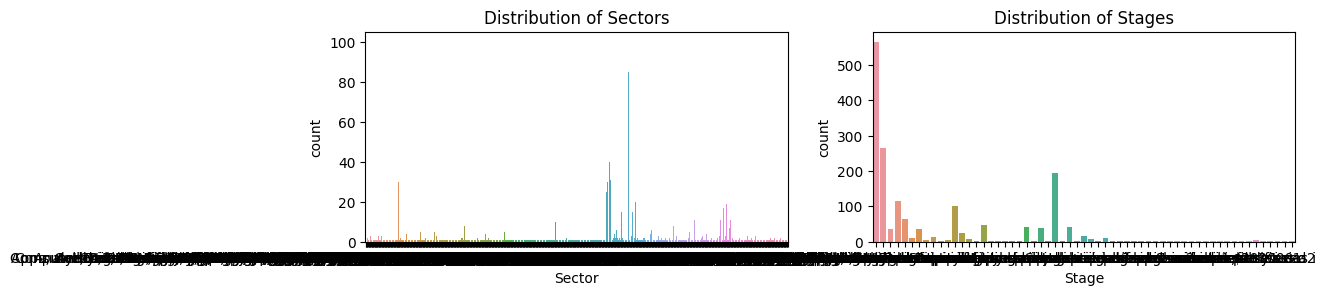

In [120]:

# Distribution of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x="Sector", data=Final_Combined_data)
plt.title('Distribution of Sectors')

plt.subplot(2, 2, 2)
sns.countplot(x="Stage", data=Final_Combined_data)
plt.title('Distribution of Stages')





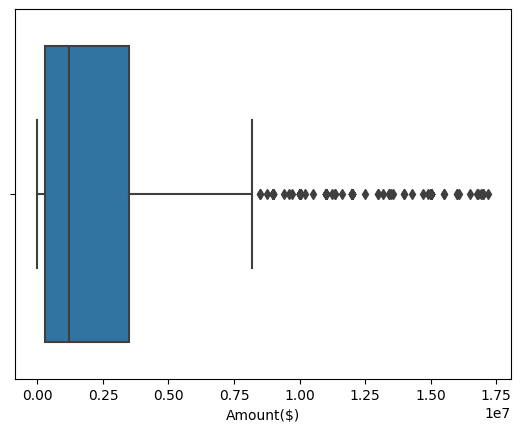

In [121]:
# Calculate IQR and identify outliers
Q1 = Final_Combined_data['Amount($)'].quantile(0.25)
Q3 = Final_Combined_data['Amount($)'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_data = Final_Combined_data[(Final_Combined_data['Amount($)'] >= (Q1 - 1.5 * IQR)) & (Final_Combined_data['Amount($)'] <= (Q3 + 1.5 * IQR))]

# Create a boxplot with the filtered data
sns.boxplot(x=filtered_data['Amount($)'])

# Show the plot
plt.show()


In [122]:

# Position of the Outlier
np.where(Final_Combined_data['Amount($)']>0.12)

(array([   0,    1,    2, ..., 1737, 1738, 1739], dtype=int64),)

### 1.Distribution of the numerical variable (Amount) using a histogram.
### 2.Identifying outliers in the "Amount" column using a boxplot.

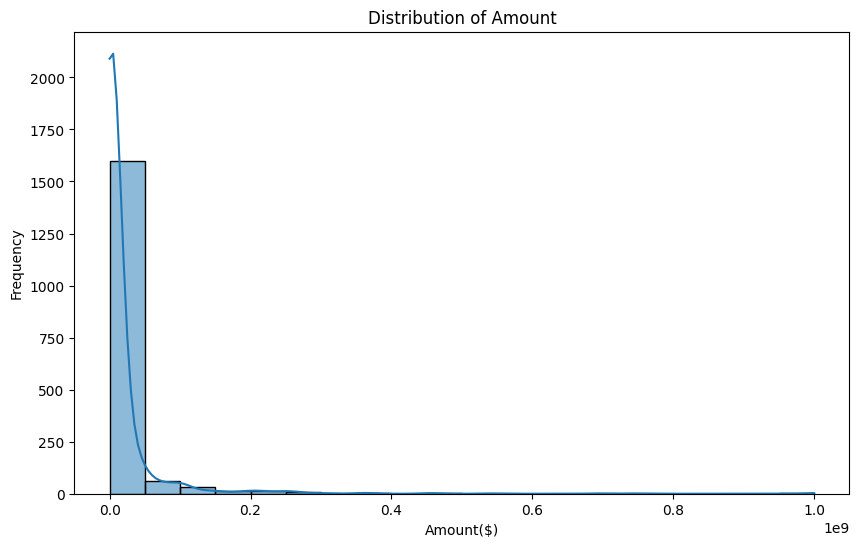

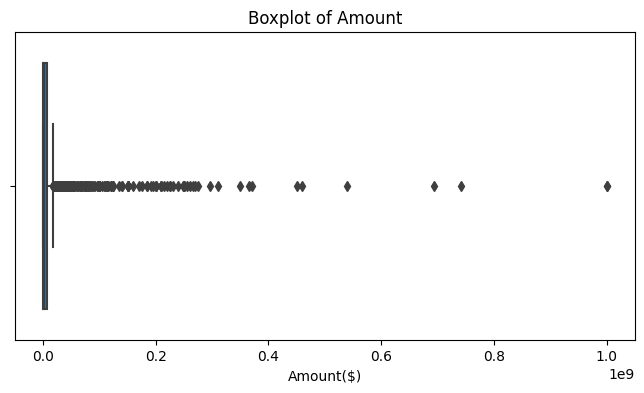

In [123]:
# Distribution of numerical variable (Amount)
plt.figure(figsize=(10, 6))
sns.histplot(Final_Combined_data["Amount($)"], bins=20, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=Final_Combined_data["Amount($)"])
plt.title('Boxplot of Amount')
plt.show()


## Data Analysis

In [124]:
Final_Combined_data.head()

,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2017.0,Unknown,Investor
1,Happy Cow Dairy,"Agriculture, Farming",seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0,2017.0,Unknown,Investor
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",series a,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0,2017.0,Unknown,Investor
3,PayMe India,"Financial Services, FinTech",angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,2017.0,Unknown,Investor
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,2017.0,Unknown,Investor


### Calculate and analyze descriptive statistics

In [125]:
# Descriptive statistics
Final_Combined_data.describe()

,Amount($),Founded
count,1.740000e+03,1740.000000
mean,1.702766e+07,2016.755172
std,5.957524e+07,2.934370
min,0.000000e+00,1982.000000
25%,4.197000e+05,2016.000000
50%,2.000000e+06,2017.000000
75%,7.225000e+06,2018.000000
max,1.000000e+09,2021.000000


### Exploratory Data Analysis (EDA)

In [126]:
Final_Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1740 entries, 0 to 1762
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1740 non-null   object 
 1   Sector         1736 non-null   object 
 2   Stage          1706 non-null   object 
 3   HeadQuarter    1740 non-null   object 
 4   What it does   1740 non-null   object 
 5   Amount($)      1740 non-null   float64
 6   Founded        1740 non-null   float64
 7   Founders       1740 non-null   object 
 8   Investor       1740 non-null   object 
dtypes: float64(2), object(7)
memory usage: 135.9+ KB


In [127]:
Final_Combined_data.describe()

,Amount($),Founded
count,1.740000e+03,1740.000000
mean,1.702766e+07,2016.755172
std,5.957524e+07,2.934370
min,0.000000e+00,1982.000000
25%,4.197000e+05,2016.000000
50%,2.000000e+06,2017.000000
75%,7.225000e+06,2018.000000
max,1.000000e+09,2021.000000


In [128]:
 # Explore unique values in the 'Sector' column
Final_Combined_data['Sector'].value_counts()

Sector
FinTech                                                              100
EdTech                                                                85
Financial Services                                                    56
E-commerce                                                            40
Fintech                                                               31
                                                                    ... 
Continuing Education, EdTech, Education, Skill Assessment              1
Smart Cities, Telecommunications                                       1
Internet of Things, Robotics                                           1
Apps, Home Services, Information Services, Information Technology      1
Staffing & Recruiting                                                  1
Name: count, Length: 711, dtype: int64

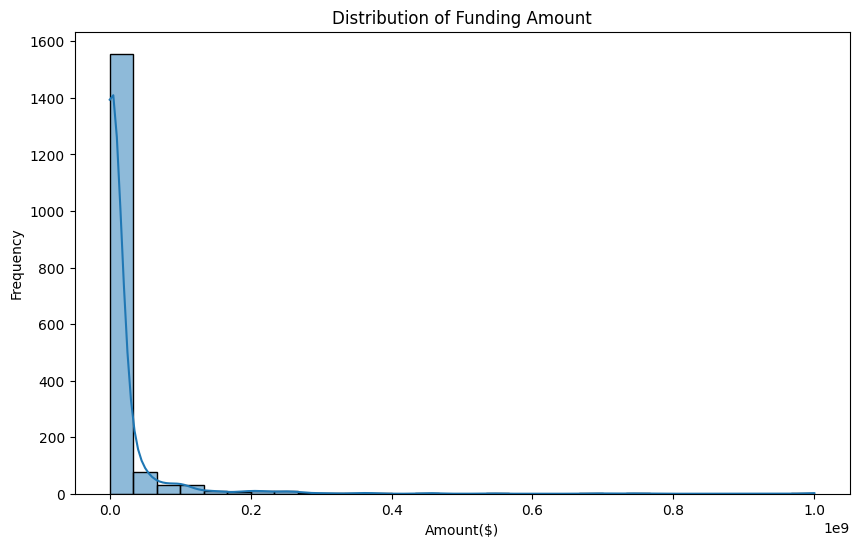

In [129]:
# Visualize the distribution of the 'Amount($)' column
plt.figure(figsize=(10, 6))
sns.histplot(Final_Combined_data['Amount($)'], bins=30, kde=True)
plt.title('Distribution of Funding Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()


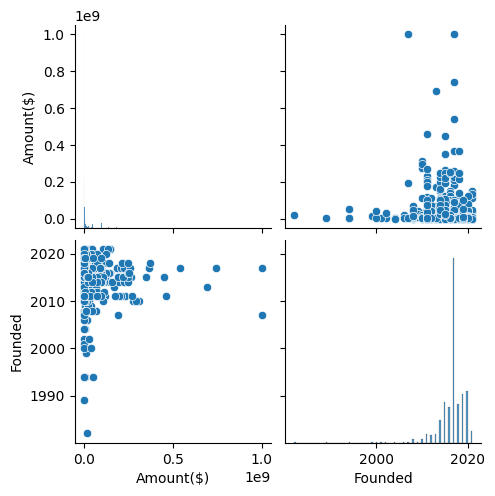

In [130]:
# Explore relationships between numerical variables
sns.pairplot(Final_Combined_data[['Amount($)', 'Founded']])
plt.show()

In [131]:
# Determine the number of top stages to display
# Identify the top 10 stages
top_stages = Final_Combined_data['Stage'].value_counts().nlargest(10).index
top_stages

Index(['seed', 'series a', 'pre-series a', 'series b', 'series c', 'pre-seed',
       'series d', 'debt', 'pre series a', 'Seed'],
      dtype='object', name='Stage')

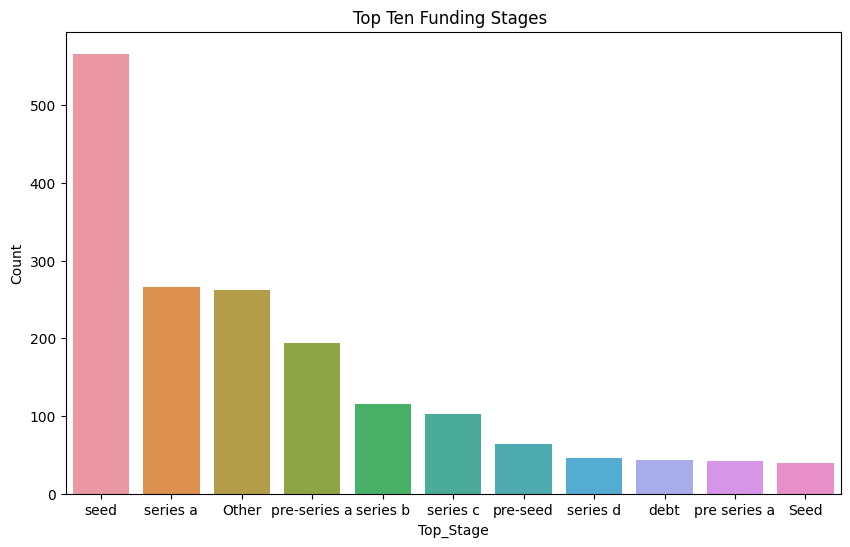

In [132]:

# Create a new column 'Top_Stage' with top N stages and 'Other' for remaining stages
Final_Combined_data['Top_Stage'] = Final_Combined_data['Stage'].apply(lambda x: x if x in top_stages else 'Other')

# Explore relationships between categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Top_Stage', data=Final_Combined_data, order=Final_Combined_data['Top_Stage'].value_counts().index)
plt.title(f'Top Ten Funding Stages ')
plt.xlabel('Top_Stage')
plt.ylabel('Count')
plt.show()


In [133]:
# Determine the number of top sectors 
top_sectors = Final_Combined_data['Sector'].value_counts().nlargest(10).index
top_sectors

Index(['FinTech', 'EdTech', 'Financial Services', 'E-commerce', 'Fintech',
       'AgriTech', '—', 'Edtech', 'Food & Beverages', 'Automotive'],
      dtype='object', name='Sector')

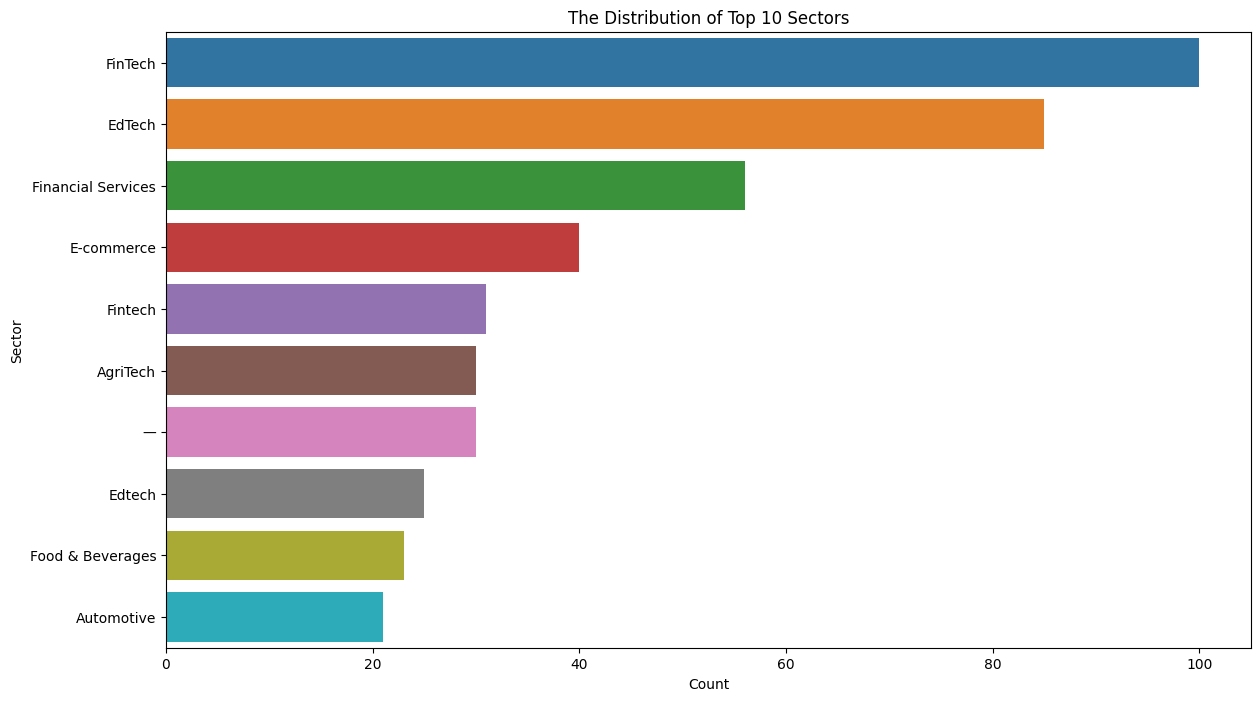

In [134]:
# Explore the distribution of sectors using a bar plot
plt.figure(figsize=(14, 8))
sns.countplot(y='Sector', data=Final_Combined_data, order=top_sectors)
plt.title('The Distribution of Top 10 Sectors')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.show()


## Hypothesis
Hypothesis: The location of a company's headquarters (HeadQuarter) is a significant factor in determining the amount of investment (Amount) it receives.

Null Hypothesis (H0): The location of a company's headquarters does not significantly impact the amount of investment it receives.

Alternative Hypothesis (H1): The location of a company's headquarters significantly affects the amount of investment it receives.

In this hypothesis, we are testing whether the location of the company's headquarters (in the "HeadQuarter" column) has a statistically significant impact on the amount of investment the company receives (in the "Amount" column).

In [135]:

# Calculate summary statistics
summary_stats = Final_Combined_data.groupby('HeadQuarter')['Amount($)'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
HeadQuarter,,,,,,,,
Ahmadabad,2.0,1.400000e+06,5.656854e+05,1000000.0,1200000.0,1400000.0,1600000.0,1800000.0
Ahmedabad,13.0,1.641381e+07,3.386683e+07,140500.0,1500000.0,3000000.0,16076000.0,125000000.0
"Ahmedabad, Gujarat, India",6.0,3.576667e+05,7.133251e+05,0.0,0.0,48000.0,211500.0,1800000.0
"Alleppey, Kerala, India",1.0,2.200000e+07,NaN,22000000.0,22000000.0,22000000.0,22000000.0,22000000.0
"Alwar, Rajasthan, India",1.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
"Trivandrum, Kerala, India",1.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0
"Tumkur, Karnataka",1.0,3.000000e+06,NaN,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0
"Uttar Pradesh, India, Asia",1.0,3.600000e+05,NaN,360000.0,360000.0,360000.0,360000.0,360000.0


In [136]:


# Perform a one-way ANOVA test
f_stat, p_value = f_oneway(*[group['Amount($)'] for name, group in Final_Combined_data.groupby('HeadQuarter')])

# Interpret the results
print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Significance level 
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: The location of a company's headquarters significantly impacts the amount of investment.")
else:
    print("Fail to reject the null hypothesis: Insufficient evidence to conclude that location significantly impacts investment.")


ANOVA F-statistic: 0.45860460163367367
P-value: 0.9999998929322365
Fail to reject the null hypothesis: Insufficient evidence to conclude that location significantly impacts investment.


## Questions and Analysis

1. What is the distribution of funding amounts for companies based on their headquarters' locations?
2. Are there significant differences in the average funding amounts between companies headquartered in different regions?
3. Which regions have the highest average funding amounts for companies?
4. Where are the Startups located and In what sectors?
5. Who are the top investors and what Sectors do they typically invest in?    



In [137]:
Final_Combined_data.head()

,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Top_Stage
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2017.0,Unknown,Investor,seed
1,Happy Cow Dairy,"Agriculture, Farming",seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0,2017.0,Unknown,Investor,seed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",series a,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0,2017.0,Unknown,Investor,series a
3,PayMe India,"Financial Services, FinTech",angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,2017.0,Unknown,Investor,Other
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,2017.0,Unknown,Investor,seed


1. What is the distribution of funding amounts for companies based on their headquarters' locations?

In [138]:
funds_by_location = Final_Combined_data.groupby(['HeadQuarter'])['Amount($)'].sum().reset_index(name='Total_Raised')
funds_by_location = funds_by_location.sort_values(by='Total_Raised', ascending=False).head(20)
funds_by_location['Total_Raised'] = funds_by_location['Total_Raised'].apply(lambda x: '${:,.2f}'.format(x))

funds_by_location

,HeadQuarter,Total_Raised
10,Bangalore,"$11,136,178,530.00"
44,Gurugram,"$3,123,120,000.00"
75,Mumbai,"$2,820,014,900.00"
12,"Bangalore, Karnataka, India","$2,291,263,120.00"
76,"Mumbai, Maharashtra, India","$1,788,632,500.00"
79,New Delhi,"$1,505,760,000.00"
90,Pune,"$1,059,501,000.00"
24,Chennai,"$660,013,000.00"
43,"Gurgaon, Haryana, India","$568,509,600.00"
30,Delhi,"$503,110,000.00"


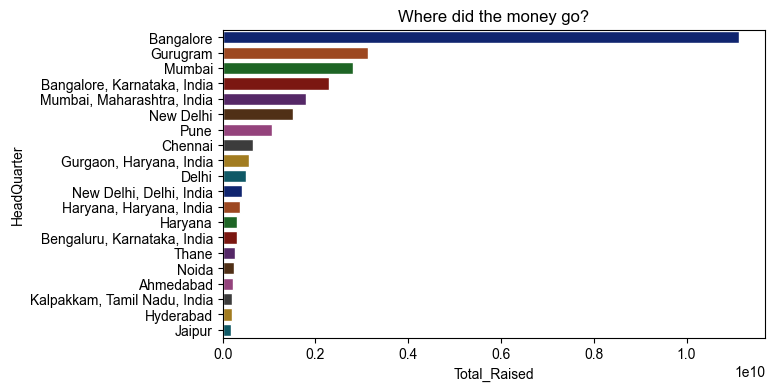

In [139]:
plt.figure(figsize=(7,4))
plt.title('Where did the money go?')
sns.set_style(style='whitegrid')
funds_by_location['Total_Raised'] = pd.to_numeric(funds_by_location['Total_Raised'].astype(str).str.replace('$', '').str.replace(',', ''))
sns.barplot(x='Total_Raised',y='HeadQuarter', palette='dark', data=funds_by_location, orient='h')
plt.show()

2. Are there significant differences in the average funding amounts between companies headquartered in different regions?

In [140]:

# Filter out companies with funding amount greater than 0 (excluding companies with no funding)
filtered_data = Final_Combined_data[Final_Combined_data['Amount($)'] > 0]

# Perform ANOVA test
result = f_oneway(*[group['Amount($)'] for name, group in filtered_data.groupby('HeadQuarter')])

# Print the result
print("ANOVA p-value:", result.pvalue)

# Interpret the result
if result.pvalue < 0.05:
    print("There are significant differences in average funding amounts between regions.")
else:
    print("There are no significant differences in average funding amounts between regions.")


ANOVA p-value: 0.9999987164858738
There are no significant differences in average funding amounts between regions.


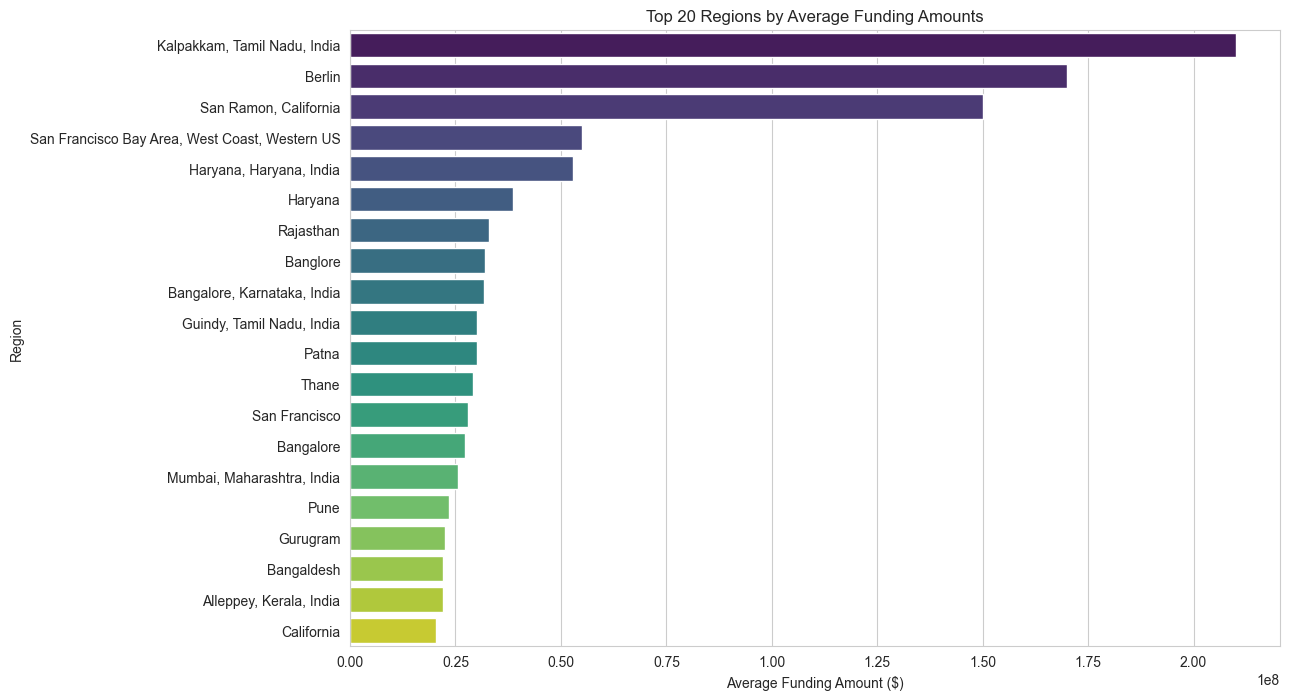

In [141]:

# Calculate average funding amounts for each region
average_funding_by_region = filtered_data.groupby('HeadQuarter')['Amount($)'].mean().sort_values(ascending=False)

# Select the top 20 regions
top_20_regions = average_funding_by_region.head(20)

# Bar plot for the top 20 regions
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_regions.values, y=top_20_regions.index, palette='viridis')
plt.title('Top 20 Regions by Average Funding Amounts')
plt.xlabel('Average Funding Amount ($)')
plt.ylabel('Region')
plt.show()



3. Which regions have the highest average funding amounts for companies?

In [142]:

# Filter companies with funding amount greater than 0 (excluding companies with no funding)
filtered_data = Final_Combined_data[Final_Combined_data['Amount($)'] > 0]

# Calculate average funding amounts by region
average_funding_by_region = filtered_data.groupby('HeadQuarter')['Amount($)'].mean().sort_values(ascending=False)

average_funding_by_region.head(20)



HeadQuarter
Kalpakkam, Tamil Nadu, India                      2.100000e+08
Berlin                                            1.700000e+08
San Ramon, California                             1.500000e+08
San Francisco Bay Area, West Coast, Western US    5.500000e+07
Haryana, Haryana, India                           5.280629e+07
Haryana                                           3.861250e+07
Rajasthan                                         3.300000e+07
Banglore                                          3.200000e+07
Bangalore, Karnataka, India                       3.182310e+07
Guindy, Tamil Nadu, India                         3.000000e+07
Patna                                             3.000000e+07
Thane                                             2.908056e+07
San Francisco                                     2.800000e+07
Bangalore                                         2.722782e+07
Mumbai, Maharashtra, India                        2.555189e+07
Pune                                       

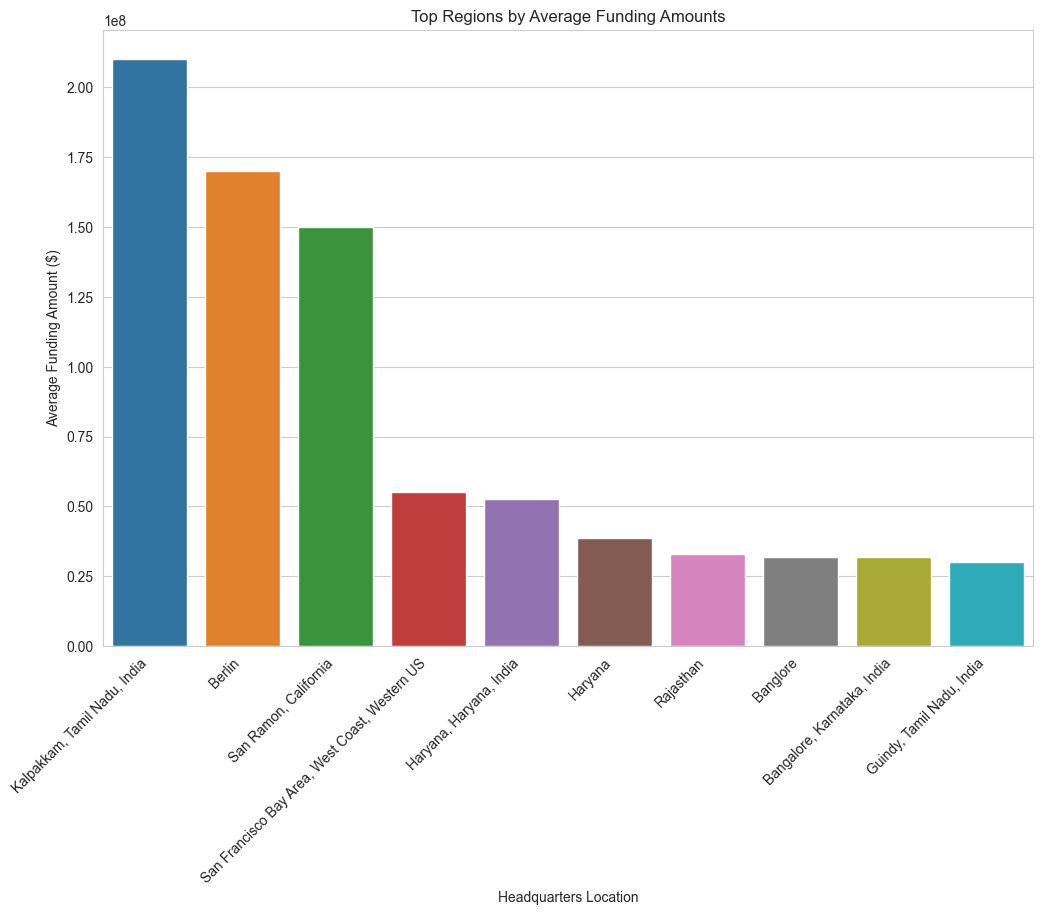

In [143]:
# Bar plot for visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=average_funding_by_region.head(10).index, y=average_funding_by_region.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('Top Regions by Average Funding Amounts')
plt.xlabel('Headquarters Location')
plt.ylabel('Average Funding Amount ($)')
plt.show()


4:Where are the Startups located and In what sectors?

This question seeks to understand where the startups are located and whether there is clustering effect among the startups. That is startups in similar or same industry setup close to one another to take advantage of skills or other kinds of resources required for that specific industry.


In [144]:
startup_location = Final_Combined_data.groupby(['HeadQuarter','Sector'])['Company_Brand'].count().reset_index(name='Number_of_firms')
startup_location = startup_location.sort_values(by='Number_of_firms', ascending=False).head(10)

startup_location

,HeadQuarter,Sector,Number_of_firms
91,Bangalore,FinTech,35
82,Bangalore,EdTech,31
94,Bangalore,Financial Services,21
556,Gurugram,EdTech,18
785,Mumbai,FinTech,17
949,New Delhi,FinTech,15
564,Gurugram,FinTech,15
776,Mumbai,EdTech,14
95,Bangalore,Fintech,10
41,Bangalore,Automotive,9


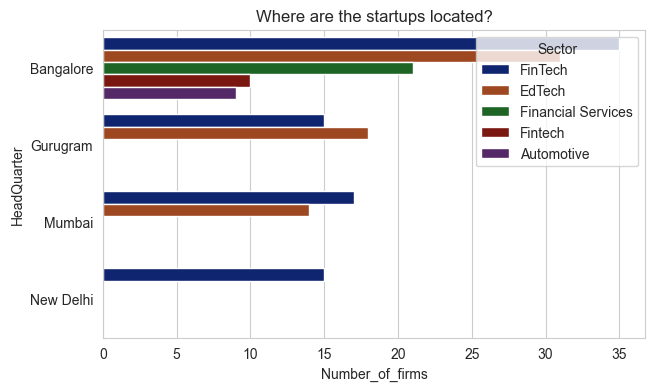

In [145]:
plt.figure(figsize=(7,4))
plt.title('Where are the startups located?')
sns.set_style(style='whitegrid')
sns.barplot(x='Number_of_firms',y='HeadQuarter', palette='dark', data=startup_location, orient='h', hue='Sector')
plt.show()

5. Who are the top investors and what Sectors do they typically invest in?    
As investors ourselves, we want to understand who are the top players on the scene. We also seek to understand 
the sectors they invest in, this will help us decide which sectors to either invest in or not.

In [146]:
investor_distribution = Final_Combined_data['Investor'].value_counts(10)
investor_distribution


Investor
Investor                                                            0.301149
Inflection Point Ventures                                           0.014368
Venture Catalysts                                                   0.009770
Tiger Global                                                        0.005172
Sequoia Capital India                                               0.004023
                                                                      ...   
Stellaris Venture Partners, Venture Highway                         0.000575
River Rock Ventures. Inflection Point Ventures                      0.000575
Bharat Inclusion Seed Fund, Varanium Capital, and Better Capital    0.000575
Tracxn Labs, Angellist, Tri-Deep Capital                            0.000575
3one4 Capital, Kalaari Capital                                      0.000575
Name: proportion, Length: 1008, dtype: float64

In [147]:
funding_by_investor = Final_Combined_data.groupby(['Investor','Sector'])['Amount($)'].sum().reset_index()
sorted_funding_by_investor = funding_by_investor.sort_values(by='Amount($)', ascending=False)
top_investors = sorted_funding_by_investor.head(5)

top_investors

,Investor,Sector,Amount($)
789,Investor,"Food Delivery, Food Processing, Internet",1.000000e+09
230,"Canaan Valley Capital, Glade Brook Capital Par...",Innovation Management,1.000000e+09
850,Investor,Insurance,7.430000e+08
1079,"MyPreferred Transformation, Avendus Finance, S...",Hospitality,6.930000e+08
731,Investor,"EdTech, Education, Higher Education, Secondary...",5.400000e+08


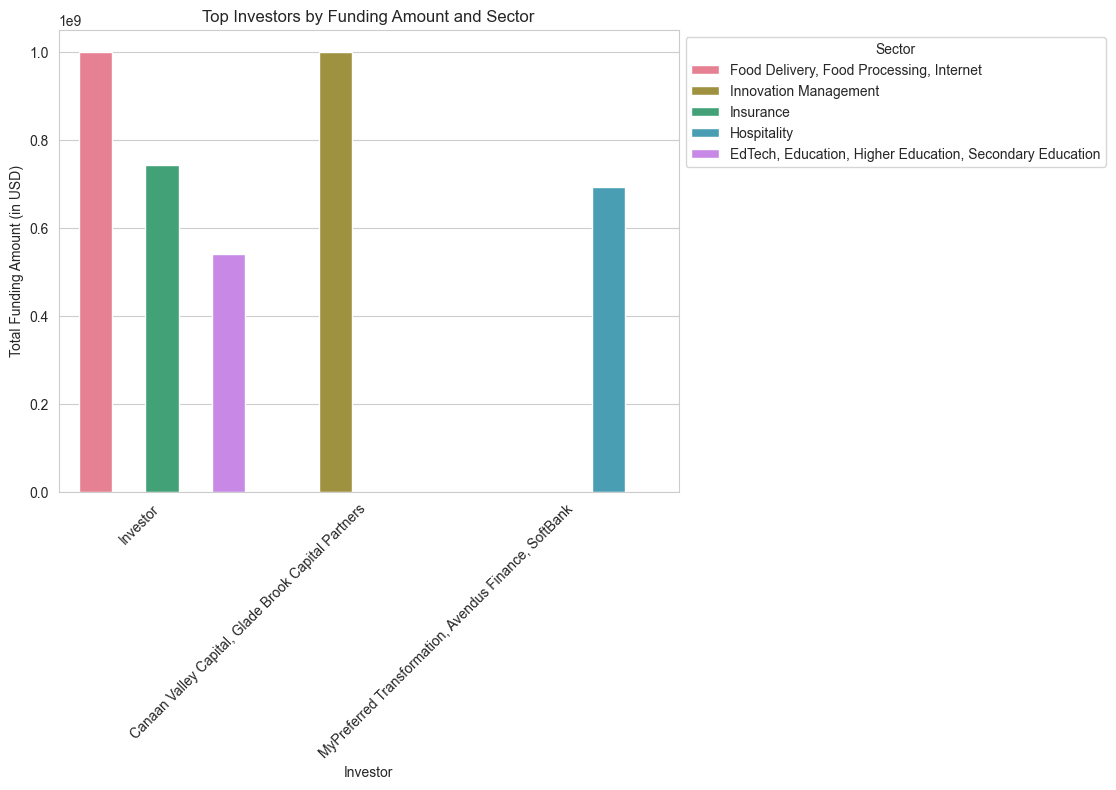

In [150]:
# Set the color palette for the sectors
sector_palette = sns.color_palette("husl", n_colors=len(top_investors['Sector'].unique()))

# Plotting a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_investors, x='Investor', y='Amount($)', hue='Sector', palette=sector_palette)
plt.title('Top Investors by Funding Amount and Sector')
plt.xlabel('Investor')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))
plt.show()

In [149]:
# Export the concatenated DataFrame to a CSV file
Final_Combined_data.to_csv('final_combined_data.csv', index=False)
